https://betterprogramming.pub/perform-xgboost-knn-modeling-with-dimension-reduction-technique-9f4ca52feeaf

we will model a classification machine learning algorithm on the MNIST data set, which is handwritten digit images. The data set contains images from zero to nine in grey-scale format. The size of each image is 28 x 28 to a total of 784 pixels. The data set is already separated into train-and-test CSV files.

<font size="5">**Implement XGBoost With Python**</font>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

digit-recognizer data at https://www.kaggle.com/c/digit-recognizer/data

In [2]:
data0 = pd.read_csv('./input/digit-recognizer/train.csv')
label = data0['label']
data  = data0.drop("label", axis=1)

print(data0.shape)
print(data.shape)

(42000, 785)
(42000, 784)


Print a number image:

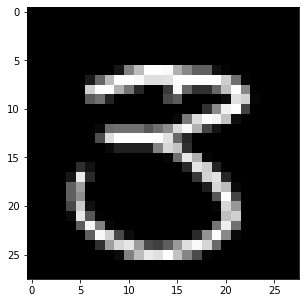

3


In [3]:
# displaying the image
plt.figure(figsize=(5,5))
idx = 7
grid_data = data.iloc[idx].to_numpy().reshape(28,28)  
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()
print(label[idx])

We only take part of the data:

In [4]:
#taking sample data
label_sample = label.head(35000)
data_sample  = data.head(35000)
print("Data sample shape = ", data_sample.shape)

Data sample shape =  (35000, 784)


Now, let's see how many counts are there for each label in [0-9].

In [5]:
count_table = data0.label.value_counts()
print (count_table)

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64


In [6]:
#reset index order and visualize

<AxesSubplot:xlabel='index', ylabel='label'>

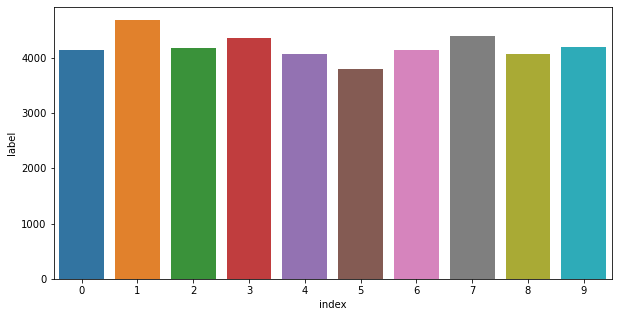

In [7]:
count_table = count_table.reset_index().sort_values(by='index') 
plt.figure(figsize=(10, 5))
sns.barplot(x='index', y='label', data=count_table)

Apply StandardScaler to the data:

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sc = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(data_sample, label_sample, stratify=label_sample, test_size=0.22, random_state=42)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Create XGBClassifier which a tree type, and check the classification report.


In [9]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

clftre = XGBClassifier()
clftre.fit(X_train,y_train)
print(classification_report(y_test, clftre.predict(X_test)))

[17:55:09] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       751
           1       0.99      0.99      0.99       859
           2       0.96      0.97      0.96       771
           3       0.98      0.96      0.97       797
           4       0.97      0.97      0.97       741
           5       0.97      0.96      0.97       703
           6       0.98      0.98      0.98       754
           7       0.98      0.97      0.97       810
           8       0.97      0.97      0.97       743
           9       0.95      0.96      0.96       771

    accuracy                           0.97      7700
   macro avg       0.97      0.97      0.97      7700
weighted avg       0.97      0.97      0.97

Now we will try to reduce the dimension with the help of the PCA technique:

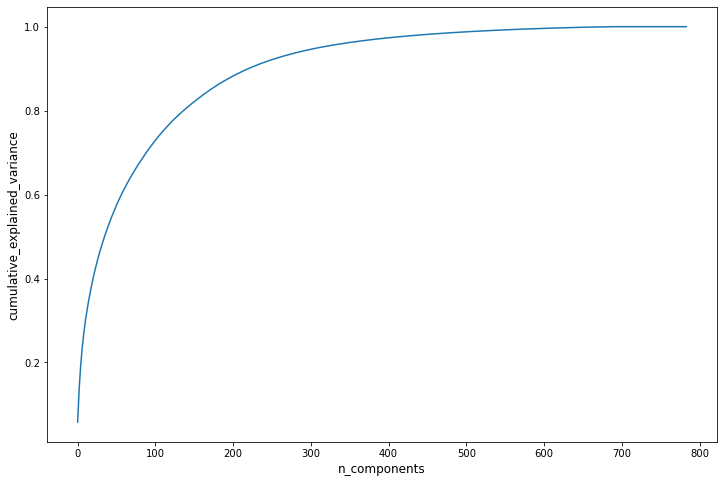

In [10]:
#Using PCA technique
pca = PCA(svd_solver='randomized', random_state=42)
pca.fit(X_train)

fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('n_components', fontsize = 12)
plt.ylabel('cumulative_explained_variance', fontsize = 12)
plt.show()

From the above plot, we can take 100 dimensions, approximately, as 70% of the variance is explained.

Data processing needed before this, follow the CNN for MRB data demonstration

In [1]:

"""No need to split at the moment, as we only have 1 snapshot
v_trn, v_val = train_test_split(df_scaled, test_size = 0.2, random_state = 24, shuffle = True) #incomplete
print (v_trn.shape, v_val.shape)
#Let's reshape to get 4D data as input (note  nt =1 ignored), sounds stupid though.
v_trn = np.reshape(v_trn.to_numpy().flatten(), (473, 120, -1))
v_val = np.reshape(v_val.to_numpy().flatten(), (473, 120, -1))
nx, ny, nv  = v_trn.shape
print (nx,ny,nv)
"""

"No need to split at the moment, as we only have 1 snapshot\nv_trn, v_val = train_test_split(df_scaled, test_size = 0.2, random_state = 24, shuffle = True) #incomplete\nprint (v_trn.shape, v_val.shape)\n#Let's reshape to get 4D data as input (note  nt =1 ignored), sounds stupid though.\nv_trn = np.reshape(v_trn.to_numpy().flatten(), (473, 120, -1))\nv_val = np.reshape(v_val.to_numpy().flatten(), (473, 120, -1))\nnx, ny, nv  = v_trn.shape\nprint (nx,ny,nv)\n"

In [11]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()
pca.n_components = 100
pca_data = pca.fit_transform(data_sample)
# The data will be in a 2-d form after pca
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (35000, 100)


Now we can see that the feature dimensions are reduced to 100 from 784. It’s time to retrain the XGBoost model with PCA data.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(pca_data, label_sample, stratify=label_sample, test_size=0.22, random_state=42)
clftre = XGBClassifier()
clftre.fit(X_train,y_train)

[17:56:44] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [13]:
print(classification_report(y_test, clftre.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       751
           1       0.99      0.99      0.99       859
           2       0.96      0.95      0.95       771
           3       0.94      0.95      0.94       797
           4       0.96      0.96      0.96       741
           5       0.95      0.95      0.95       703
           6       0.97      0.98      0.97       754
           7       0.97      0.97      0.97       810
           8       0.94      0.94      0.94       743
           9       0.93      0.92      0.92       771

    accuracy                           0.96      7700
   macro avg       0.96      0.96      0.96      7700
weighted avg       0.96      0.96      0.96      7700



<font size="5">**Implement the KNN With Python**<font>


Everything is the same as in XGBoost. To know the value of k with good accuracy with a for loop:

In [14]:
kVals = range(1, 30, 2)
accuracies = []
#We will use for loop to over the various k value for good accuracy
for k in range(1, 30, 2):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
   #creating a list of k values and accuracy
    score = model.score(X_test, y_test)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)

k=1, accuracy=96.57%
k=3, accuracy=96.78%
k=5, accuracy=96.65%
k=7, accuracy=96.62%
k=9, accuracy=96.53%
k=11, accuracy=96.32%
k=13, accuracy=96.13%
k=15, accuracy=96.05%
k=17, accuracy=95.84%
k=19, accuracy=95.84%
k=21, accuracy=95.62%
k=23, accuracy=95.61%
k=25, accuracy=95.36%
k=27, accuracy=95.32%
k=29, accuracy=95.25%


Now retrain the model with the value of k=5 and get the classification report without PCA.

In [15]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("EVALUATION ON TESTING DATA")
print(classification_report(y_test, predictions))

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       751
           1       0.96      1.00      0.98       859
           2       0.98      0.96      0.97       771
           3       0.97      0.96      0.96       797
           4       0.98      0.96      0.97       741
           5       0.94      0.96      0.95       703
           6       0.98      0.99      0.98       754
           7       0.95      0.98      0.96       810
           8       0.99      0.93      0.95       743
           9       0.95      0.94      0.95       771

    accuracy                           0.97      7700
   macro avg       0.97      0.97      0.97      7700
weighted avg       0.97      0.97      0.97      7700



Now we will find the accuracy with 400 PCA components.